<span style="font-size: 30px;">P452 End Semester Exam</span>  
<span style="font-size: 25px;">Pabitra Ranjan Giri</span>  
<span style="font-size: 25px;">Roll-2011103</span>


### Question-1

In [20]:
import numpy as np

# Define the decay function
def decay(t, tau):
    return np.exp(-t/tau)

# Define the chi-square function
def chi_squared(tau, t, N, sigma_N):
    expected_N = decay(t, tau)
    chi2 = np.sum(((N - expected_N) / sigma_N)**2)
    return chi2

# Read data from file
data = np.loadtxt("endsemfit.txt")

t = data[:, 0]  # Time (seconds)
N = data[:, 1]  # Total counts
sigma_N = np.sqrt(N)  # Uncertainties in counts

# Performing linear regression using chi-square minimization
# Initial guess for lifetime
tau_guess = 10

# Define step size for numerical derivative
h = 1e-5

# Define a tolerance for convergence
tolerance = 1e-5

# Maximum number of iterations
max_iterations = 1000

# Gradient descent
for _ in range(max_iterations):
    # Compute the gradient
    chi2 = chi_squared(tau_guess, t, N, sigma_N)
    chi2_plus_h = chi_squared(tau_guess + h, t, N, sigma_N)
    gradient = (chi2_plus_h - chi2) / h

    # Update tau
    tau_guess -= gradient * 0.001

    # Check for convergence
    if abs(gradient) < tolerance:
        break

# Extract the lifetime and its error
tau_fit = tau_guess
tau_error = np.sqrt(2 / np.sum(((N - decay(t, tau_fit)) / sigma_N)**2))

# Calculate the reduced chi-square
reduced_chi2 = chi_squared(tau_fit, t, N, sigma_N) / (len(t) - 1)

# Determine if the fit is acceptable at 5% level of significance
if reduced_chi2 <= 0.05:
    fit_acceptable = True
else:
    fit_acceptable = False

print("Lifetime of the radioactive source:", tau_fit, "seconds")
print("Error in lifetime:", tau_error, "seconds")
print("Reduced χ²:", reduced_chi2)


Lifetime of the radioactive source: 10.128687411779538 seconds
Error in lifetime: 0.055486766139129166 seconds
Reduced χ²: 72.1786338781123
Is the fit acceptable at 5% level of significance? False


The reduced Chi-squared value for 5% significance is 16.919  (Degree of freedom = 9)  
For the given data we find reduced Chi-squared value = 72.17 , which is greater.  
So, the performed fit does not have 5% significance level

### Question-2

In [26]:
import mylibrary.fpm as fpm
import math

T = 300
p = 5.95
R = 0.0821
a = 6.254
b = 0.05422

def f(v):
    return (p+(a/v**2))*(v-b)-R*T

def f1(V):
    return ((R*T*V**2)/(p*V**2 +a))+b

def f2(v):
    return math.sqrt((((R*T*v**2)/(v-b)) - a)/p)

# Initial guess
V = 1
tol = 10**-5 # tolerance
print("Solution using first fixed point equation(f1) :")
result1 = fpm.main(f1,V,tol)
print(result1)
print("")
print("Solution using Second fixed point equation(f2) :")
result2 = fpm.main(f2,V,tol)
print(result2)
print("")
print("Value of function at V =",round(result1,5))
print(f(result1))

Solution using first fixed point equation(f1) :
No. of iterations =  9
3.929948420939441

Solution using Second fixed point equation(f2) :
No. of iterations =  21
3.9299402265625787

Value of function at V = 3.92995
-1.9271282951649482e-06


### Question-3

All theory(in answer sheet)

### Question-4

In [44]:
import numpy as np

# Given vectors
v = np.array([1, 0])
x = np.array([1, 2])

# Calculate tau
tau = 2 / np.dot(v, v)

# Calculate P
P = np.identity(2) - tau * np.outer(v, v)

# Calculate Px
Px = np.dot(P, x)

# Verify if Px is the reflected vector
reflected_vector = np.array([-x[0], x[1]])

if np.array_equal(Px, reflected_vector):
    print("Px is the reflected vector:", Px)
else:
    print("Px is not the reflected vector:", Px)


Px is the reflected vector: [-1.  2.]


### Question-5

In [45]:
import mylibrary.pwm as pwm
import math

matrix = np.array([[2 ,-1 , 0 , 0 , 0],
                   [-1 , 2 , -1 , 0 , 0],
                   [ 0 , -1 , 2 , -1 , 0],
                   [ 0 , 0 , -1 , 2 , -1],
                   [ 0 , 0 , 0 , -1 , 2]])

N=1000 # No. of Iterations
eigenvalues , eigenvectors = pwm.main(matrix,N)
print("Eigenvalues and eigenvectors calculated using Power method\n")
print("Eigenvalues:")
print(eigenvalues)
print("Eigenvectors:")
print(eigenvectors)

print("Eigenvalues and eigenvectors calculated using given formula\n")
lambda_k = [(2 + 2*math.cos(k*math.pi/6)) for k in range(1,6)]
v_k_i = np.zeros((5,5))
for k in range(1,6):
    for i in range(1,6):
        v_k_i[k-1,i-1] = 2*math.sin(i*k*math.pi/6)

print("Eigenvalues:")
print(lambda_k)
print("Eigenvectors:")
print(v_k_i)


Eigenvalues and eigenvectors calculated using Power method

Eigenvalues:
[ 3.73205081 -3.46410162  7.19615242 -6.92820323 10.66025404]
Eigenvectors:
[[ 0.28867264 -0.4999975   0.57735027 -0.5000025   0.28867763]
 [ 0.28867513  0.5         0.57735027  0.5         0.28867513]
 [-0.28867986  0.50000473 -0.57735027  0.49999527 -0.28867041]
 [ 0.28867513  0.5         0.57735027  0.5         0.28867513]
 [ 0.28866796 -0.49999283  0.57735027 -0.50000717  0.28868231]]
Eigenvalues and eigenvectors calculated using given formula

Eigenvalues:
[3.7320508075688776, 3.0, 2.0, 1.0000000000000004, 0.2679491924311226]
Eigenvectors:
[[ 1.00000000e+00  1.73205081e+00  2.00000000e+00  1.73205081e+00
   1.00000000e+00]
 [ 1.73205081e+00  1.73205081e+00  2.44929360e-16 -1.73205081e+00
  -1.73205081e+00]
 [ 2.00000000e+00  2.44929360e-16 -2.00000000e+00 -4.89858720e-16
   2.00000000e+00]
 [ 1.73205081e+00 -1.73205081e+00 -4.89858720e-16  1.73205081e+00
  -1.73205081e+00]
 [ 1.00000000e+00 -1.73205081e+00  2

The results do not match the formula because the matrix is sparse, half of the elements are zero

### Question-6

Success Probability: 1.0


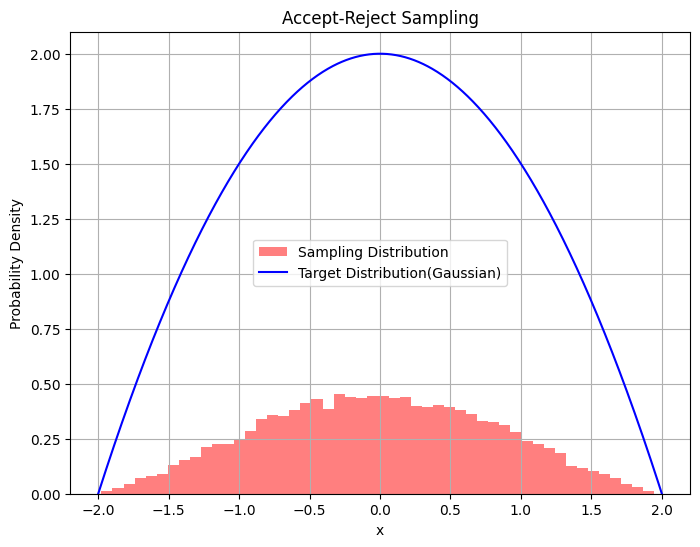

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Target probability distribution function
def p(x, a):
    if abs(x) < a:
        return 0.5 * (a**2 - x**2)
    else:
        return 0

# Define the Gaussian distribution function
def gaussian(x, mean, var):
    return np.exp(-(x - mean)**2 / (2 * var)) / np.sqrt(2 * np.pi * var)

# Parameters
a = 2
var = 2  # Variance of the Gaussian distribution
p_max = max(p(x, a) for x in np.linspace(-a, a, 1000))  # Maximum value of p(x)

# Accept-Reject method
accepted_samples = []
num_samples = 10000
while len(accepted_samples) < num_samples:
    x = np.random.normal(0, np.sqrt(var))  # Sample from Gaussian distribution
    u = np.random.uniform(0, p_max)  # Sample from uniform distribution
    if u < p(x, a):
        accepted_samples.append(x)

# Plotting
x_val = np.linspace(-a, a, 1000)
p_val = [p(x, a) for x in x_val]

# Calculate success probability
success_probability = len(accepted_samples) / num_samples
print("Success Probability:", success_probability)

plt.figure(figsize=(8, 6))
plt.hist(accepted_samples, bins=50, density=True, alpha=0.5, label='Sampling Distribution',color="red")
plt.plot(x_val, p_val, 'b-', label='Target Distribution(Gaussian)')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Accept-Reject Sampling')
plt.legend()
plt.grid(True)
plt.show()

The sampled distribution does not fit the target distribution  
This shows that the sampling distribution in a poor choice to sample the given target distribution

### Question-7

C:\Users\manor\AppData\Local\Temp\ipykernel_11560\3532743821.py:21: RuntimeWarning: invalid value encountered in scalar divide
  acceptance_prob = min(1, psi(new_x, a)**2 / psi(current_x, a)**2)
C:\Users\manor\AppData\Local\Temp\ipykernel_11560\3532743821.py:21: RuntimeWarning: divide by zero encountered in scalar divide
  acceptance_prob = min(1, psi(new_x, a)**2 / psi(current_x, a)**2)


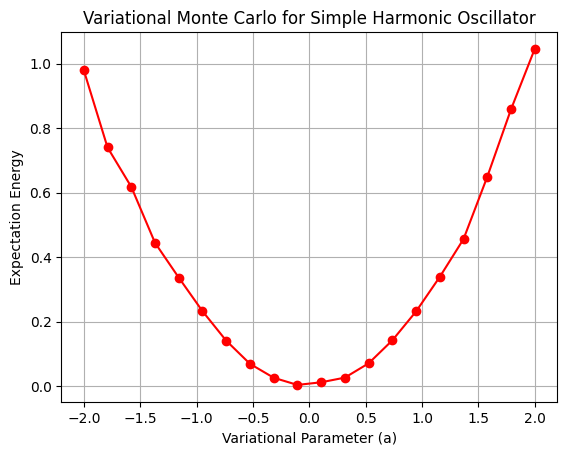

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Trial wavefunction for the simple harmonic oscillator
def psi(x, a):
    return np.exp(-x**2 / (2 * a**2))

# Potential energy function for the simple harmonic oscillator
def pot_energy(x):
    return 0.5 * x**2

# Function to perform Metropolis sampling
def metropolis_sampling(x, a, n_steps):
    samples = []
    current_x = x
    for _ in range(n_steps):
        # Propose a new position
        new_x = np.random.normal(current_x, 0.5)
        
        # Metropolis acceptance criterion
        acceptance_prob = min(1, psi(new_x, a)**2 / psi(current_x, a)**2)
        if np.random.uniform(0, 1) < acceptance_prob:
            current_x = new_x
        
        samples.append(current_x)
    return samples

num = 20

a_values = np.linspace(-2.0, 2.0, num)

# Number of Monte Carlo steps
n_steps = 20000

energies = []

# Perform VMC for each value of a
for a in a_values:
    # Initial position for Metropolis sampling
    initial_x = np.random.uniform(-5, 5)
    
    # Perform Metropolis sampling
    samples = metropolis_sampling(initial_x, a, n_steps)
    
    # Calculate the expectation value of the energy
    expectation_energy = np.mean([pot_energy(x) for x in samples])
    
    energies.append(expectation_energy)

# Plotting
plt.plot(a_values, energies, marker='o', linestyle='-',color='red')
plt.xlabel('Variational Parameter (a)')
plt.ylabel('Expectation Energy')
plt.title('Variational Monte Carlo for Simple Harmonic Oscillator')
plt.grid(True)
plt.show()